# Rotational Transform Sandbox

__Objectives__:

1.  Use the dot product to rotate data.
2.  Play around with these transformation matrices to get a feel for how their values shape the resulting output data. 
3.  When do your edits cause other things to happen, in addition to rotation? In other words, do your transformation matrices sometimes also scale or translate the data? 

# Original Data

__To do__: Run the cell below to initialize the smiley face dataset.

Original M0.shape = (300, 3)

First few rows of M0:
[[-50.     50.      1.   ]
 [-49.975  48.414   1.   ]
 [-49.899  46.829   1.   ]
 [-49.774  45.247   1.   ]
 [-49.598  43.67    1.   ]]


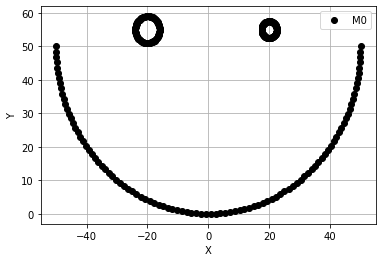

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

# Smiley face dataset
n = 100
theta = np.linspace( -np.pi, 0, n ).reshape((n,1))
X_mouth = 50*np.cos(theta)
Y_mouth = 50*np.sin(theta) + 50
X_left = 4*np.cos(theta*2.0) - 20
Y_left = 4*np.sin(theta*2.0) + 55
X_right = 2.5*np.cos(theta*2.0) + 20
Y_right = 2.5*np.sin(theta*2.0) + 55
X = np.vstack((X_mouth, X_left, X_right))
Y = np.vstack((Y_mouth, Y_left, Y_right))
H = np.ones((X.shape))
M0 = np.hstack((X,Y,H))

# Sanity check
print("Original M0.shape =", M0.shape)
print("\nFirst few rows of M0:")
print(M0[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

# 2D Rotation

The cell below applies a rotational transformation to the smiley face dataset. 

__To do__: 

 1. Look at the difference between the original dataset and the transformed data.

 2. Which axis looks like the axis of rotation? (X, Y, or Z: the "view axis" coming out of your screen?)

 >> Z

 3. Can you guess the magnitude of the rotation, in degrees? *Hint: the contents of the rotation matrix are sines and cosines of the angle of rotation. Do you see any familiar values? Can math.acos() or math.asin() help?*

 >> 60

T4:
[[ 0.5   -0.866  0.   ]
 [ 0.866  0.5    0.   ]
 [ 0.     0.     1.   ]]

First row of M0: [-50.  50.   1.]

First row of M4: [-68.301 -18.301   1.   ]


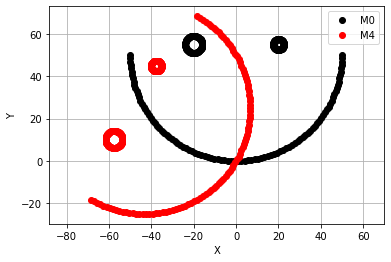

In [7]:
# Transformation Matrix T4
T4 = np.eye( 3 )            # Starting out with the identity matrix makes designing transformations easier
rad = 60.0 * np.pi / 180.0  # Trig functions like sin() and cos() expect angles in radians
T4[0,0] =  np.cos( rad )
T4[1,0] =  np.sin( rad )
T4[0,1] = -np.sin( rad )
T4[1,1] =  np.cos( rad )
print("T4:")
print(T4)

# Perform Transformation T4
M4 = (T4 @ M0.T).T

# Sanity check
print("\nFirst row of M0:", M0[0,:])
print("\nFirst row of M4:", M4[0,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M4[:,0], M4[:,1], "or", label="M4" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

### Free-for-all
Try out your own transformations to see what they do! You can start with a goal in mind, or just plug in values and run.**bold text**

T5:
[[ 0. -1. 10.]
 [ 1.  0. 10.]
 [ 0.  0.  1.]]

First row of M0: [-50.  50.   1.]

First row of M5: [-40. -40.   1.]


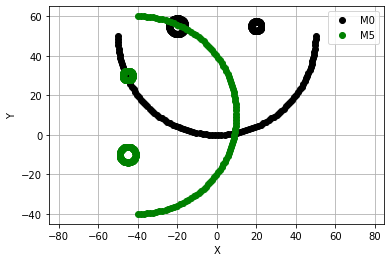

In [9]:
# Transformation Matrix T5
T5 = np.eye( 3 )            # Starting out with the identity matrix makes designing transformations easier
# Transformation
T5[0,2] = 10
T5[1,2] = 10
# Rotation
rad = 90 * np.pi / 180
T5[0,0] =  np.cos( rad )
T5[1,0] =  np.sin( rad )
T5[0,1] = -np.sin( rad )
T5[1,1] =  np.cos( rad )

# YOUR TURN: 
# WHAT WOULD YOU LIKE T5 TO DO? EDIT AWAY!


print("T5:")
print(T5)

# Perform Transformation T5
M5 = (T5 @ M0.T).T

# Sanity check
print("\nFirst row of M0:", M0[0,:])
print("\nFirst row of M5:", M5[0,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M5[:,0], M5[:,1], "og", label="M5" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

# 3D Rotation

We can only do 3D transformations on data with at least 3 dimensions. So, first we need to add a third dimension to our smiley face dataset. Run the code cell below to add a feature along the third axis, "Z", and visualize the new dataset.

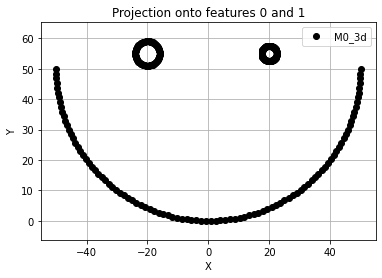

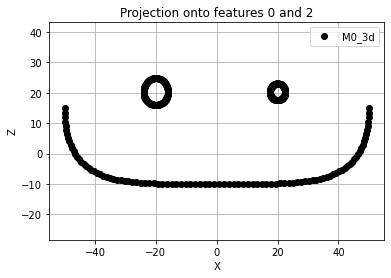

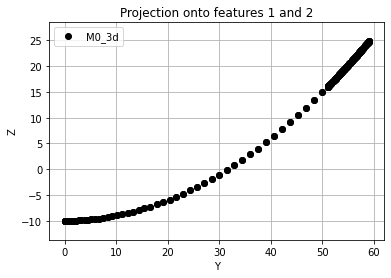

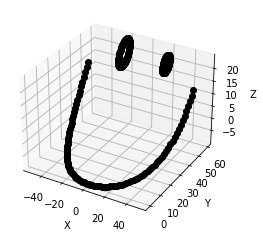

In [21]:
# Add a 3rd dimension to our dataset:
n = M0.shape[0]
x_col = M0[:,0].reshape((n,1))
y_col = M0[:,1].reshape((n,1))
z_col = 0.01*y_col**2 - 10
ones_col = M0[:,2].reshape((n,1))
M0_3d = np.hstack( (x_col, y_col, z_col, ones_col) )

# Visualize each of the 3 possible projections: (x,y), (x,z), and (y,z)
feature_names = ["X", "Y", "Z"]
for i in range(2):
    for j in range(i+1,3):
        plt.figure()
        plt.title( "Projection onto features {0} and {1}".format( i, j ))
        plt.plot( M0_3d[:,i], M0_3d[:,j], "ok", label="M0_3d" )
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.grid( True )
        plt.axis( "equal" )
        plt.legend()

# Visualize projections in 3d.
plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(M0_3d[:,0], M0_3d[:,1], M0_3d[:,2], 'ok', label="M0_3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 3D Rotation: Example 1

Now that we have a 3D dataset, we can see the first 3D rotation from today's lecture in action:

T6:
[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]

First row of M0_3d: [-50.  50.  15.   1.]

First row of M6: [15. 50. 50.  1.]


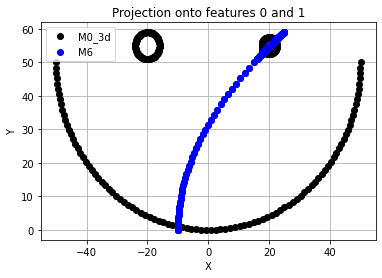

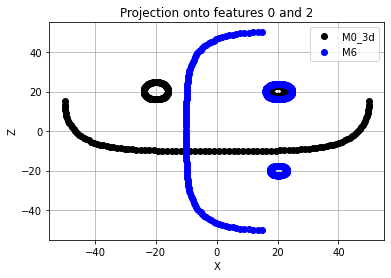

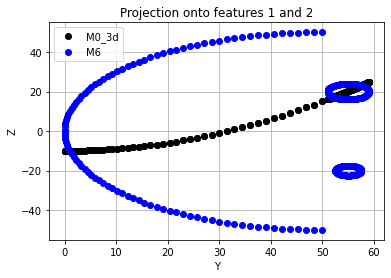

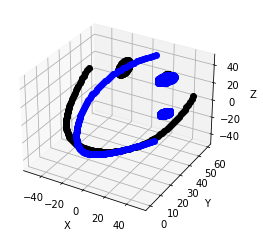

In [22]:
# Transformation Matrix T6
T6 = np.eye( 4 )            # Notice that we have a larger 4x4 matrix now. 2D rotation started with a 3x3 matrix!
rad = 90 * np.pi / 180.0
T6[0,0:3] = np.array( [[  np.cos(rad),  0,  np.sin(rad) ]] )
T6[1,0:3] = np.array( [[  0,  1,  0 ]] )
T6[2,0:3] = np.array( [[ -np.sin(rad),  0,  np.cos(rad) ]] )
print("T6:")
print(T6)

# Perform Transformation T6
M6 = (T6 @ M0_3d.T).T

# Sanity check
print("\nFirst row of M0_3d:", M0_3d[0,:])
print("\nFirst row of M6:", M6[0,:])

# Visualize each of the 3 possible projections: (x,y), (x,z), and (y,z)
feature_names = ["X", "Y", "Z"]
for i in range(2):
    for j in range(i+1,3):
        plt.figure()
        plt.title( "Projection onto features {0} and {1}".format( i, j ))
        plt.plot( M0_3d[:,i], M0_3d[:,j], "ok", label="M0_3d" )
        plt.plot( M6[:,i], M6[:,j], "ob", label="M6" )
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.grid( True )
        plt.legend()

# Visualize projections in 3d.
plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(M0_3d[:,0], M0_3d[:,1], M0_3d[:,2], 'ok', label="M0_3d")
ax.plot3D(M6[:,0], M6[:,1], M6[:,2], 'ob', label="M6")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 3D Rotation: Example 2

T7:
[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  1.]]

First row of M0_3d: [-50.  50.  15.   1.]

First row of M7: [-50.  15. -50.   1.]


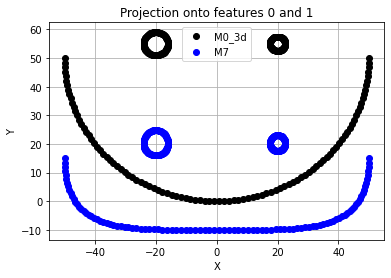

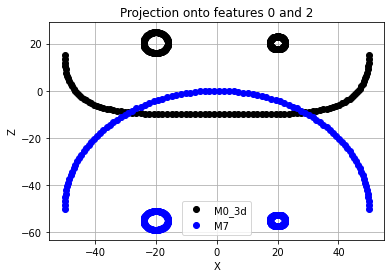

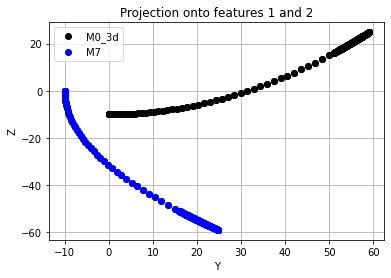

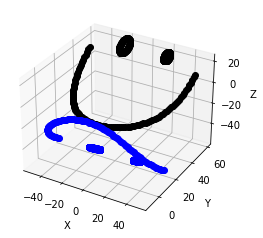

In [23]:
# Transformation Matrix T7
T7 = np.eye( 4 )
rad = -90.0 * np.pi / 180.0
T7[0,0:3] = np.array( [[  1,  0,  0 ]] )
T7[1,0:3] = np.array( [[  0,  np.cos(rad),  -np.sin(rad) ]] )
T7[2,0:3] = np.array( [[  0, np.sin(rad),  np.cos(rad) ]] )
print("T7:")
print(T7)

# Perform Transformation T6
M7 = (T7 @ M0_3d.T).T

# Sanity check
print("\nFirst row of M0_3d:", M0_3d[0,:])
print("\nFirst row of M7:", M7[0,:])

# Visualize each of the 3 possible projections: (x,y), (x,z), and (y,z)
feature_names = ["X", "Y", "Z"]
for i in range(2):
    for j in range(i+1,3):
        plt.figure()
        plt.title( "Projection onto features {0} and {1}".format( i, j ))
        plt.plot( M0_3d[:,i], M0_3d[:,j], "ok", label="M0_3d" )
        plt.plot( M7[:,i], M7[:,j], "ob", label="M7" )
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.grid( True )
        plt.legend()

# Visualize projections in 3d.
plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(M0_3d[:,0], M0_3d[:,1], M0_3d[:,2], 'ok', label="M0_3d")
ax.plot3D(M7[:,0], M7[:,1], M7[:,2], 'ob', label="M7")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 3D Rotation: Example 3

Just to show that it's possible, here's our 2D rotation example from the beginning of class, reworked in 3D. It's still rotating about the Z axis.

T4_3d:
[[ 0.5   -0.866  0.     0.   ]
 [ 0.866  0.5    0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]

First row of M0_3d: [-50.  50.  15.   1.]

First row of M6: [-68.301 -18.301  15.      1.   ]


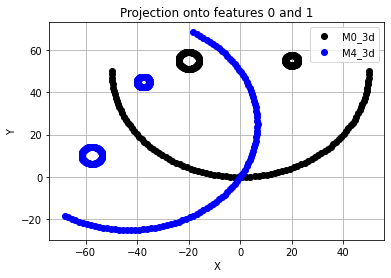

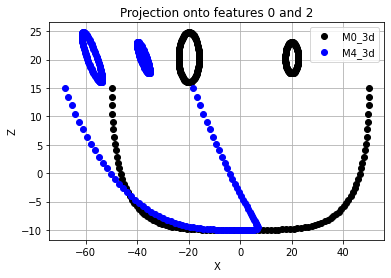

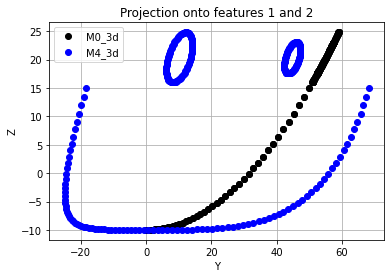

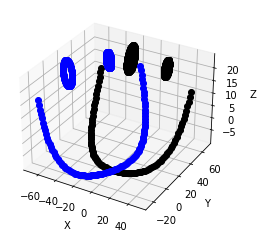

In [25]:
# Transformation Matrix T4_3d
T4_3d = np.eye( 4 )            # Notice that we have a larger 4x4 matrix now. 2D rotation started with a 3x3 matrix!

# Our 2D example still works! Try it out:
rad = 60.0 * np.pi / 180.0
T4_3d[0,0] =  np.cos( rad )
T4_3d[1,0] =  np.sin( rad )
T4_3d[0,1] = -np.sin( rad )
T4_3d[1,1] =  np.cos( rad )

print("T4_3d:")
print(T4_3d)

# Perform Transformation T6
M4_3d = (T4_3d @ M0_3d.T).T

# Sanity check
print("\nFirst row of M0_3d:", M0_3d[0,:])
print("\nFirst row of M6:", M4_3d[0,:])

# Visualize each of the 3 possible projections: (x,y), (x,z), and (y,z)
feature_names = ["X", "Y", "Z"]
for i in range(2):
    for j in range(i+1,3):
        plt.figure()
        plt.title( "Projection onto features {0} and {1}".format( i, j ))
        plt.plot( M0_3d[:,i], M0_3d[:,j], "ok", label="M0_3d" )
        plt.plot( M4_3d[:,i], M4_3d[:,j], "ob", label="M4_3d" )
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.grid( True )
        plt.legend()

# Visualize projections in 3d.
plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(M0_3d[:,0], M0_3d[:,1], M0_3d[:,2], 'ok', label="M0_3d")
ax.plot3D(M4_3d[:,0], M4_3d[:,1], M4_3d[:,2], 'ob', label="M4_3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()